# Bank Marketing Campaign as Strategic Marketing Analyst

Created by: Anna Charieninna

## Business Problem Understanding

**Context**

Bank X berencana meningkatkan valuasinya melaului kampanye dalam pembukaan deposito. Selama ini, Bank X tidak melakukan penawaran secara terukur untuk mengidentifikasi nasabah yang tertarik atau tidak untuk membuka deposito.

Menindaklanjuti hal tersebut, Bank X merekrut seorang Strategic Marketing Analyst yang brpengalaman untuk membuat model untuk menyaring nasabah yang tertarik untuk membuka rekening deposito.

Dalam memprediksi nasabah yang tertarik ini, Bank X dapat menghemat biaya pemasaran dan mengefisensi waktu.

**Problem Statement**

 Bank X sering kali mengadakan marketing campaign, namun belum melakukan campaign yang memanfaatkan profil nasabah sehingga campaign cendrung tidak tepat sasaran. Campaign yang tidak efektif dapat memakan biaya dan waktu yang cukup besar.

**Goals :**

Dari permasalahan tersebut, bank bertujuan untuk mengidentifikasi kategori nasabah ang tertarik untuk melakukan deposito. Dengan cara ini, upaya pemasaran dapat diarahkan kepada nasabah yang berpotensi untuk membuka rekening deposito.

Untuk mencapai hal ini, bank menerapkan model machine learning untuk menentukan apakah seorang nasabah yang cenderung untuk membuka rekening deposito atau tidak. Akibatnya, bank dapat mendekati segmen pelanggan yang tepat untuk pembukaan rekening deposito.

**Analytic Approach:**

Sebagai strategic marketing analyst, yang akan saya lakukan adalah membangun model untuk memprediksi nasabah yang cendrung tertarik untuk melakukan deposito atau tidak untuk meminimalisir biaya marketing.

Saya akan membangun model dengan metode supervised learning karena datanya sudah memiliki label, dalam hal ini adalah deposit yang akan menjadi target label

Adapun metode supervised learning yang digunakan adalah jenis klasifikasi yang akan membantu perusahaan untuk dapat menganalisis efektivitas kampanye pemasaran sebelumnya dengan memeriksa jumlah kontak, waktu kontak, hasil kampanye sebelumnya, dan interaksi pelanggan.


**Metric Evaluation**

Sasaran analisis adalah sebagai berikut:
0: Tidak (tidak bermaksud untuk membuka rekening deposito)
1: Ya (bermaksud untuk membuka rekening deposito)

Type I Error | False Positive : ketika sistem memprediksi minat pelanggan untuk membuka rekening deposito, namun pada kenyataannya, mereka tidak bermaksud melakukannya, implikasinya adalah bahwa inisiatif pemasaran bank mungkin sia-sia, karena mereka tidak akan efektif mencapai audiens yang dituju.

Type II Error | False Negative :  ketika sistem memprediksi bahwa pelanggan tidak tertarik untuk membuka rekening deposito, namun pada kenyataannya, mereka ingin membuka satu, hasilnya adalah bahwa bank akan kehilangan potensi keuntungan dari pelanggan-pelanggan ini yang sungguh-sungguh berniat membuka rekening deposito.

## Data Understanding

Note :
- Dataset tidak seimbang
- Sebagian besar fitur bersifat kategori (Nominal, Ordinal, Label).
- Setiap baris data merepresentasikan informasi seorang nasabah yang yang pernah ditawarkan deposito.




**Attribute information:**

**Customer Profile**

age : umur nasabah

job : pekerjaan nasabah

balance : saldo nasabah

housing : nasabah yang memiliki kredit KPR

loan : nasabah yang memiliki pinjaman di bank

**Marketing data**

contact: tipe komunikasi

month: bulan terakhir kontak

campaign: jumlah kontak yang dilakukan selama kampanye dan untuk klien ini.

pdays: jumlah hari setelah klien dihubungi dari kampanye sebelumnya

poutcome: hasil dari kampanye pemasaran sebelumnya.

deposit: nasabah yang melakukan deposit atau tidak.

In [1]:
!pip install category_encoders
!pip install imblearn
!pip install --upgrade scikit-learn


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 26.7 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [2]:
!pip install --upgrade scikit-learn imbalanced-learn
!pip install scikit-learn==<version>
!pip install imbalanced-learn==<version>



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 257.7/257.7 kB 1.9 MB/s eta 0:00:00
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.10.1
    Uninstalling imbalanced-learn-0.10.1:
      Successfully uninstalled imbalanced-learn-0.10.1
/bin/bash: -c: line 1: syntax error near unexpected token `newline'
/bin/bash: -c: line 1: `pip install scikit-learn==<version>'
/bin/bash: -c: line 1: syntax error near unexpected token `newline'
/bin/bash: -c: line 1: `pip install imbalanced-learn==<version>'


In [3]:
!pip install --upgrade imbalanced-learn


In [4]:
# Library

import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import missingno
from IPython.display import display

# Feature Engineering
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
import category_encoders as ce

# Model Selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV,StratifiedKFold,train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import lightgbm as lgb
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score
from sklearn.metrics import roc_curve, roc_auc_score


# Imbalance Dataset
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler

# Ignore Warning
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")

# Set max columns
pd.set_option('display.max_columns', None)

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
bank_dataset = pd.read_csv("/content/drive/MyDrive/data_bank_marketing_campaign (1).csv")
bank_dataset.head()

,age,job,balance,housing,loan,contact,month,campaign,pdays,poutcome,deposit
0,55,admin.,1662,no,no,cellular,jun,2,-1,unknown,yes
1,39,self-employed,-3058,yes,yes,cellular,apr,3,-1,unknown,yes
2,51,admin.,3025,no,no,cellular,may,1,352,other,yes
3,38,services,-87,yes,no,cellular,may,1,-1,unknown,no
4,36,housemaid,205,yes,no,telephone,nov,4,-1,unknown,no


In [7]:
display('Ada {} baris dan {} kolom'.format(bank_dataset.shape[0], bank_dataset.shape[1]))

'Ada 7813 baris dan 11 kolom'

In [8]:
bank_dataset.describe()

,age,balance,campaign,pdays
count,7813.000000,7813.000000,7813.000000,7813.000000
mean,41.257264,1512.448611,2.519775,51.408550
std,11.919710,3089.291831,2.727001,108.072739
min,18.000000,-6847.000000,1.000000,-1.000000
25%,32.000000,127.000000,1.000000,-1.000000
50%,39.000000,549.000000,2.000000,-1.000000
75%,49.000000,1684.000000,3.000000,40.000000
max,95.000000,66653.000000,63.000000,854.000000


In [9]:
bank_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7813 entries, 0 to 7812
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   age       7813 non-null   int64 
 1   job       7813 non-null   object
 2   balance   7813 non-null   int64 
 3   housing   7813 non-null   object
 4   loan      7813 non-null   object
 5   contact   7813 non-null   object
 6   month     7813 non-null   object
 7   campaign  7813 non-null   int64 
 8   pdays     7813 non-null   int64 
 9   poutcome  7813 non-null   object
 10  deposit   7813 non-null   object
dtypes: int64(4), object(7)
memory usage: 671.6+ KB


Matrix Plot

Berikutnya, sekarang mari kita visualisasikan missing values/data yang hilang pada dataframe kita dengan menggunakan library missingno

reference: https://www.geeksforgeeks.org/python-visualize-missing-values-nan-values-using-missingno-library/

<Axes: >

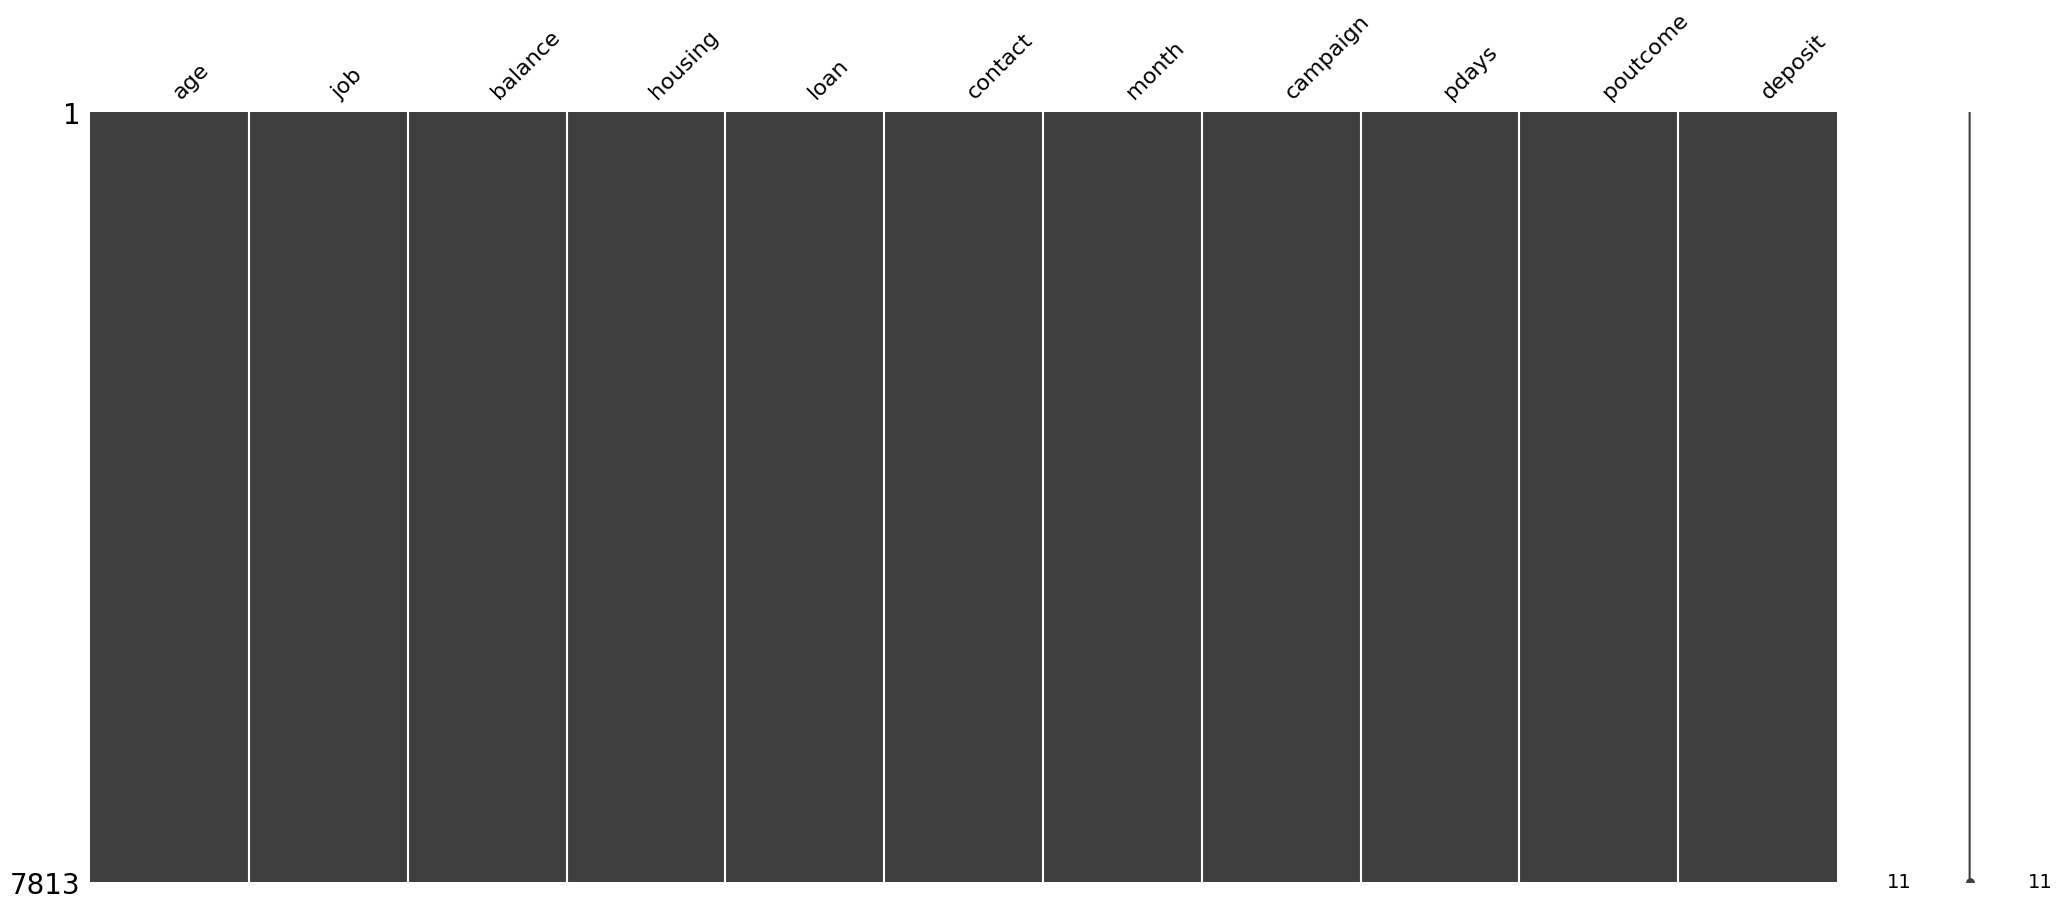

In [10]:
missingno.matrix(bank_dataset)


Datanya tidak ada missing value. Namun, terkadang plot bisa bias, mari kita periksa masing-masing fitur dengan angka.

In [11]:
print('Data columns with null values:',bank_dataset.isnull().sum(), sep = '\n')

Data columns with null values:
age         0
job         0
balance     0
housing     0
loan        0
contact     0
month       0
campaign    0
pdays       0
poutcome    0
deposit     0
dtype: int64


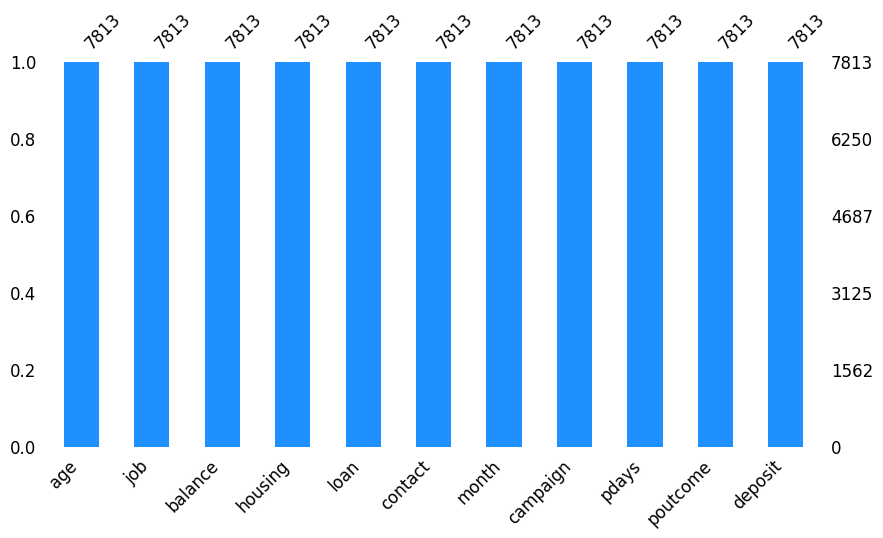

In [12]:
missingno.bar(bank_dataset,color="dodgerblue", sort="ascending", figsize=(10,5), fontsize=12);

Dari data tersebut, memang tidak ada yang missing value. Namun kita perlu cek atribut dimasing-masing mana nilai yang menyerupai nan.

In [13]:
pd.set_option('display.max_colwidth', None)
# data uni di tiap kolom
listItem = []
for col in bank_dataset.columns :
    listItem.append( [col, bank_dataset[col].nunique(), bank_dataset[col].unique()])

tabel1Desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
tabel1Desc

,Column Name,Number of Unique,Unique Sample
0,age,75,"[55, 39, 51, 38, 36, 41, 37, 35, 57, 23, 33, 31, 53, 30, 46, 48, 25, 29, 28, 52, 49, 44, 42, 27, 47, 64, 26, 34, 56, 32, 58, 45, 54, 50, 79, 65, 40, 24, 60, 43, 61, 59, 62, 68, 82, 71, 73, 76, 69, 20, 72, 22, 67, 19, 70, 75, 63, 93, 77, 80, 66, 21, 87, 81, 92, 88, 84, 83, 78, 74, 18, 85, 95, 86, 90]"
1,job,12,"[admin., self-employed, services, housemaid, technician, management, student, blue-collar, entrepreneur, retired, unemployed, unknown]"
2,balance,3153,"[1662, -3058, 3025, -87, 205, -76, 4803, 911, 805, 0, 1234, 1107, 1170, 341, 4808, 88, 169, 863, 242, 2597, 4929, 277, 1438, 15, 3733, 204, 1684, 1025, 55, 19, 348, 785, 742, 511, 6651, 1612, 555, 54, 1185, 110, 950, 412, 228, 367, 3993, 2599, 3528, 32, 551, 3161, 533, 8725, 349, 514, 2688, -194, 154, 874, 2, 5953, 1269, -327, 235, 7, 2661, 1948, 20, 502, 193, 13658, 1716, 172, 1667, 157, 8, 951, 427, 241, 469, 2060, 7177, 655, -114, 588, -971, 4570, 250, 131, 93, 22, 15341, 356, 190, -124, 2228, -60, 376, 1567, 855, 4151, ...]"
3,housing,2,"[no, yes]"
4,loan,2,"[no, yes]"
5,contact,3,"[cellular, telephone, unknown]"
6,month,12,"[jun, apr, may, nov, jan, sep, feb, mar, aug, jul, oct, dec]"
7,campaign,32,"[2, 3, 1, 4, 5, 6, 7, 30, 8, 9, 11, 14, 10, 28, 63, 12, 24, 17, 15, 18, 19, 13, 21, 23, 22, 33, 16, 25, 26, 20, 29, 43]"
8,pdays,422,"[-1, 352, 21, 91, 186, 263, 96, 355, 294, 412, 89, 114, 276, 93, 175, 57, 323, 156, 86, 95, 271, 182, 289, 334, 269, 309, 144, 183, 417, 138, 254, 337, 171, 389, 87, 170, 165, 372, 247, 98, 196, 469, 272, 104, 63, 587, 336, 145, 130, 28, 202, 324, 147, 94, 328, 420, 179, 90, 81, 160, 298, 356, 357, 267, 430, 52, 181, 365, 237, 330, 103, 374, 75, 133, 321, 204, 782, 266, 197, 270, 318, 349, 187, 359, 490, 192, 227, 100, 168, 177, 251, 301, 350, 92, 184, 345, 290, 199, 333, 169, ...]"
9,poutcome,4,"[unknown, other, failure, success]"


In [14]:
bank_dataset['contact'].value_counts()

cellular     5628
unknown      1639
telephone     546
Name: contact, dtype: int64

In [15]:
bank_dataset['job'].value_counts()

management       1792
blue-collar      1346
technician       1291
admin.            936
services          658
retired           540
self-employed     280
unemployed        249
student           247
entrepreneur      236
housemaid         184
unknown            54
Name: job, dtype: int64

In [16]:
bank_dataset['poutcome'].value_counts()

unknown    5819
failure     848
success     761
other       385
Name: poutcome, dtype: int64

**Ada fitur yang mempunyai nilai menyerupai nan yaitu dengan nilai `unknown`nya yaitu fitur `contact`, `job`, dan `poutcome`. Namun perlu dilakukan pengecekkan dimasing-masing fitur.**

1. Nilai unknown pada fitur contact yaitu sampai 20% dari data. Dari beberapa referensi di kaggle, nilai unknown ini tidak di ganti nilainya. Namun, dibiarkan saja (berikan linknya).

2. Nilai unknown pada fitur job hanya mencapai 0,6% dari data, maka diisi dengan nilai modus saja menggunakan imputer.

3. Nilai unknown pada fitur poutcome sangat mendominasi yaitu sampai 75% dari total keseluruhan data. Jadi lebih baik fitur poutcome di hapus saja.

In [17]:
bank_model = bank_dataset.copy()

## Data Cleaning

Setelah melakukan data understanding, mari kita bersihkan data yang misisng value dengan melakukan penghapusan dan mengisi nilainya.

In [18]:
# Konversi nilai "unknown" menjadi NaN
bank_model['job'].replace('unknown', np.nan, inplace=True)

# Membuat objek imputer dengan strategi 'most_frequent' (modus)
imputer = SimpleImputer(strategy='most_frequent')

# Mengisi nilai NaN dengan modus pada kolom 'job'
bank_model['job'] = imputer.fit_transform(bank_model[['job']])

In [19]:
bank_model

,age,job,balance,housing,loan,contact,month,campaign,pdays,poutcome,deposit
0,55,admin.,1662,no,no,cellular,jun,2,-1,unknown,yes
1,39,self-employed,-3058,yes,yes,cellular,apr,3,-1,unknown,yes
2,51,admin.,3025,no,no,cellular,may,1,352,other,yes
3,38,services,-87,yes,no,cellular,may,1,-1,unknown,no
4,36,housemaid,205,yes,no,telephone,nov,4,-1,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...
7808,62,housemaid,2,no,no,cellular,nov,1,-1,unknown,yes
7809,48,housemaid,5473,no,no,cellular,feb,2,184,success,yes
7810,36,management,179,no,no,cellular,aug,8,-1,unknown,no
7811,31,admin.,54,yes,no,cellular,nov,1,-1,unknown,no


In [20]:
bank_model.job.value_counts()

management       1846
blue-collar      1346
technician       1291
admin.            936
services          658
retired           540
self-employed     280
unemployed        249
student           247
entrepreneur      236
housemaid         184
Name: job, dtype: int64

In [21]:
bank_model.contact.value_counts()

cellular     5628
unknown      1639
telephone     546
Name: contact, dtype: int64

In [22]:
# Menghapus fitur 'poutcome' dari DataFrame
bank_model.drop(columns=['poutcome'], inplace=True)

In [23]:
bank_model

,age,job,balance,housing,loan,contact,month,campaign,pdays,deposit
0,55,admin.,1662,no,no,cellular,jun,2,-1,yes
1,39,self-employed,-3058,yes,yes,cellular,apr,3,-1,yes
2,51,admin.,3025,no,no,cellular,may,1,352,yes
3,38,services,-87,yes,no,cellular,may,1,-1,no
4,36,housemaid,205,yes,no,telephone,nov,4,-1,no
...,...,...,...,...,...,...,...,...,...,...
7808,62,housemaid,2,no,no,cellular,nov,1,-1,yes
7809,48,housemaid,5473,no,no,cellular,feb,2,184,yes
7810,36,management,179,no,no,cellular,aug,8,-1,no
7811,31,admin.,54,yes,no,cellular,nov,1,-1,no


### **Cek Duplikasi Data**

In [24]:
duplikat = bank_model[bank_dataset.duplicated()]
duplikat


,age,job,balance,housing,loan,contact,month,campaign,pdays,deposit
2944,40,blue-collar,0,yes,no,unknown,may,2,-1,no
4368,60,management,0,no,no,cellular,aug,3,-1,yes
4874,41,management,0,no,no,cellular,aug,2,-1,no
5326,44,blue-collar,0,yes,no,cellular,jul,1,-1,no
5609,39,technician,0,yes,no,unknown,may,1,-1,no
5681,38,technician,0,no,no,cellular,aug,2,-1,no
5905,34,management,0,no,no,cellular,aug,2,-1,no
7077,30,blue-collar,239,yes,no,unknown,may,1,-1,yes


**Ada 8 data yang duplikat, maka kita harus menghapusnya.**

In [25]:
bank_model.drop_duplicates(inplace=True)



In [26]:
# Mendeteksi duplikat data dalam dataframe
duplikat = bank_model.duplicated()
duplikat.value_counts() #hasilnya false tidak ada duplikat

False    7805
dtype: int64

**Tidak ada lagi data yang duplikat (hasil bernilai false).**

###**Cek Outlier Data**

Let's check out our numerical feature outliers through boxplot

<ipython-input-27-14da0cc7cc42>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


Text(0.5, 1.0, 'balance')

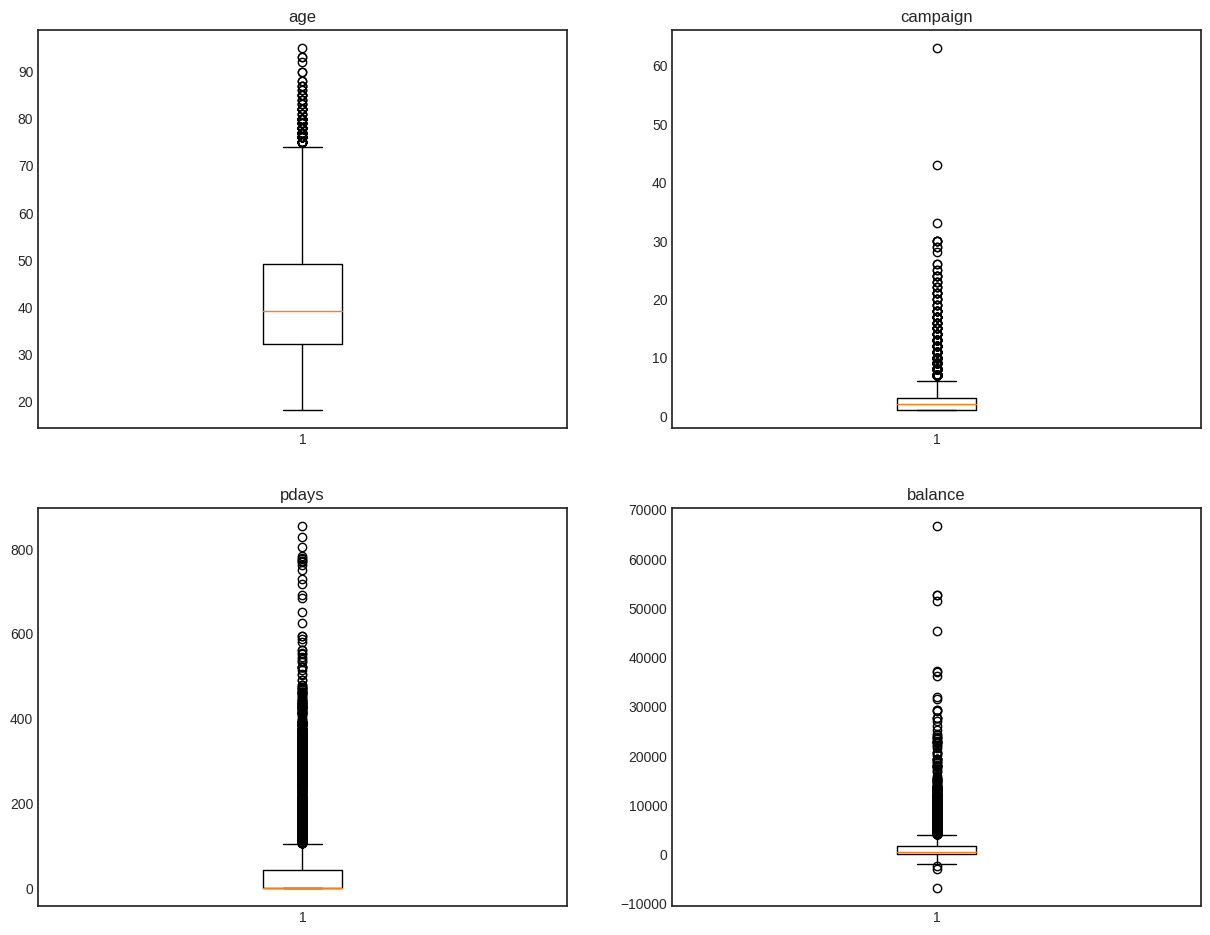

In [27]:
plt.figure(figsize = (15, 30))
plt.style.use('seaborn-white')
ax=plt.subplot(521)
plt.boxplot(bank_model['age'])
ax.set_title('age')
ax=plt.subplot(522)
plt.boxplot(bank_model['campaign'])
ax.set_title('campaign')
ax=plt.subplot(523)
plt.boxplot(bank_model['pdays'])
ax.set_title('pdays')
ax=plt.subplot(524)
plt.boxplot(bank_model['balance'])
ax.set_title('balance')

Penghapusan outlier dengan menggunakan metode IQR (Interquartile Range) adalah salah satu pendekatan umum dalam analisis data untuk membersihkan dataset dari nilai yang ekstrem atau tidak biasa yang dapat mempengaruhi hasil analisis.

Berikut adalah konsep dasar dari penghapusan outlier menggunakan metode IQR:

Hitung Quartile Pertama (Q1) dan Quartile Ketiga (Q3):

Quartile pertama (Q1) adalah nilai di mana 25% data terendah berada.
Quartile ketiga (Q3) adalah nilai di mana 75% data terendah berada.
Hitung IQR (Interquartile Range):

IQR adalah selisih antara Q3 dan Q1, yaitu Q3 - Q1.
Tentukan Batas Atas dan Batas Bawah:

Batas bawah ditentukan dengan rumus:
Batas Bawah = Q1 - (1,5 * IQR)
Batas Atas = Q3 + (1.5 * IQR)

Identifikasi Outlier:
Nilai yang berada di luar batas bawah atau batas atas dianggap sebagai outlier.

Mencari distribusi dari fitur numerik kontinu (Continuous Numerical Features) dari satu set data berguna untuk memahami sebaran atau pola dari nilai-nilai dalam fitur tersebut. Hal ini membantu dalam mengetahui karakteristik dari data yang sedang dianalisis, seperti apakah data memiliki kecenderungan tertentu, apakah terdapat pencilan (outlier), dan bagaimana persebaran nilai-nilai tersebut.


In [28]:
# Pilih kolom numerik dalam dataframe
numerical_features = bank_model.select_dtypes(include=['float64', 'int64'])

# Hitung IQR untuk setiap kolom numerik
Q1 = numerical_features.quantile(0.25)
Q3 = numerical_features.quantile(0.75)
IQR = Q3 - Q1

# Tentukan batas atas dan bawah untuk mendefinisikan outlier
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Tentukan lokasi outlier
outliers = ((numerical_features < lower_bound) | (numerical_features > upper_bound)).any(axis=1)

outliers

0       False
1        True
2        True
3       False
4       False
        ...  
7808    False
7809     True
7810     True
7811    False
7812    False
Length: 7805, dtype: bool

Ada 2462 data yang outlier, artinya ada 31% data yang mengandung outlier. Mari kita hapus data yang mengandung outlier.

In [29]:
lower_bound

age            6.5
balance    -2207.5
campaign      -2.0
pdays        -64.0
dtype: float64

In [30]:
upper_bound

age           74.5
balance     4020.5
campaign       6.0
pdays        104.0
dtype: float64

In [31]:
# Hapus baris yang mengandung outlier
df = bank_model[~outliers]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5343 entries, 0 to 7812
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   age       5343 non-null   int64 
 1   job       5343 non-null   object
 2   balance   5343 non-null   int64 
 3   housing   5343 non-null   object
 4   loan      5343 non-null   object
 5   contact   5343 non-null   object
 6   month     5343 non-null   object
 7   campaign  5343 non-null   int64 
 8   pdays     5343 non-null   int64 
 9   deposit   5343 non-null   object
dtypes: int64(4), object(6)
memory usage: 459.2+ KB


Kita dapat menggunakan data yang bersih (tanpa outlier) yaitu df.


In [106]:
df.deposit.value_counts()

0    2968
1    2375
Name: deposit, dtype: int64

## Data Analysis

Label yang kita gunakan adalah deposit. Namun, fiturnya masih berupa kategorikal, perlu kita ganti dengan numerical terlebih dahulu.

In [32]:
# Definisikan dictionary untuk nilai pengganti
replace_values = {"yes": 1, "no": 0}

# Ganti nilai kolom "deposit" menggunakan metode replace
df['deposit'].replace(replace_values, inplace=True)

<ipython-input-32-b098413daaf1>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['deposit'].replace(replace_values, inplace=True)


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5343 entries, 0 to 7812
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   age       5343 non-null   int64 
 1   job       5343 non-null   object
 2   balance   5343 non-null   int64 
 3   housing   5343 non-null   object
 4   loan      5343 non-null   object
 5   contact   5343 non-null   object
 6   month     5343 non-null   object
 7   campaign  5343 non-null   int64 
 8   pdays     5343 non-null   int64 
 9   deposit   5343 non-null   int64 
dtypes: int64(5), object(5)
memory usage: 459.2+ KB


Explore Categorical Features

In [34]:
categorical_features=[feature for feature in df.columns if ((df[feature].dtypes=='O') & (feature not in ['deposit']))]
categorical_features

['job', 'housing', 'loan', 'contact', 'month']

In [35]:
for feature in categorical_features:
    print('The feature is {} and number of categories are {}'.format(feature,len(bank_dataset[feature].unique())))

The feature is job and number of categories are 12
The feature is housing and number of categories are 2
The feature is loan and number of categories are 2
The feature is contact and number of categories are 3
The feature is month and number of categories are 12


- Ada 5 fitur kategorikal
- Fitur pekerjaan dan bulan merupakan fitur dengan nilai tertinggi

**Find Categorical Feature Distribution**

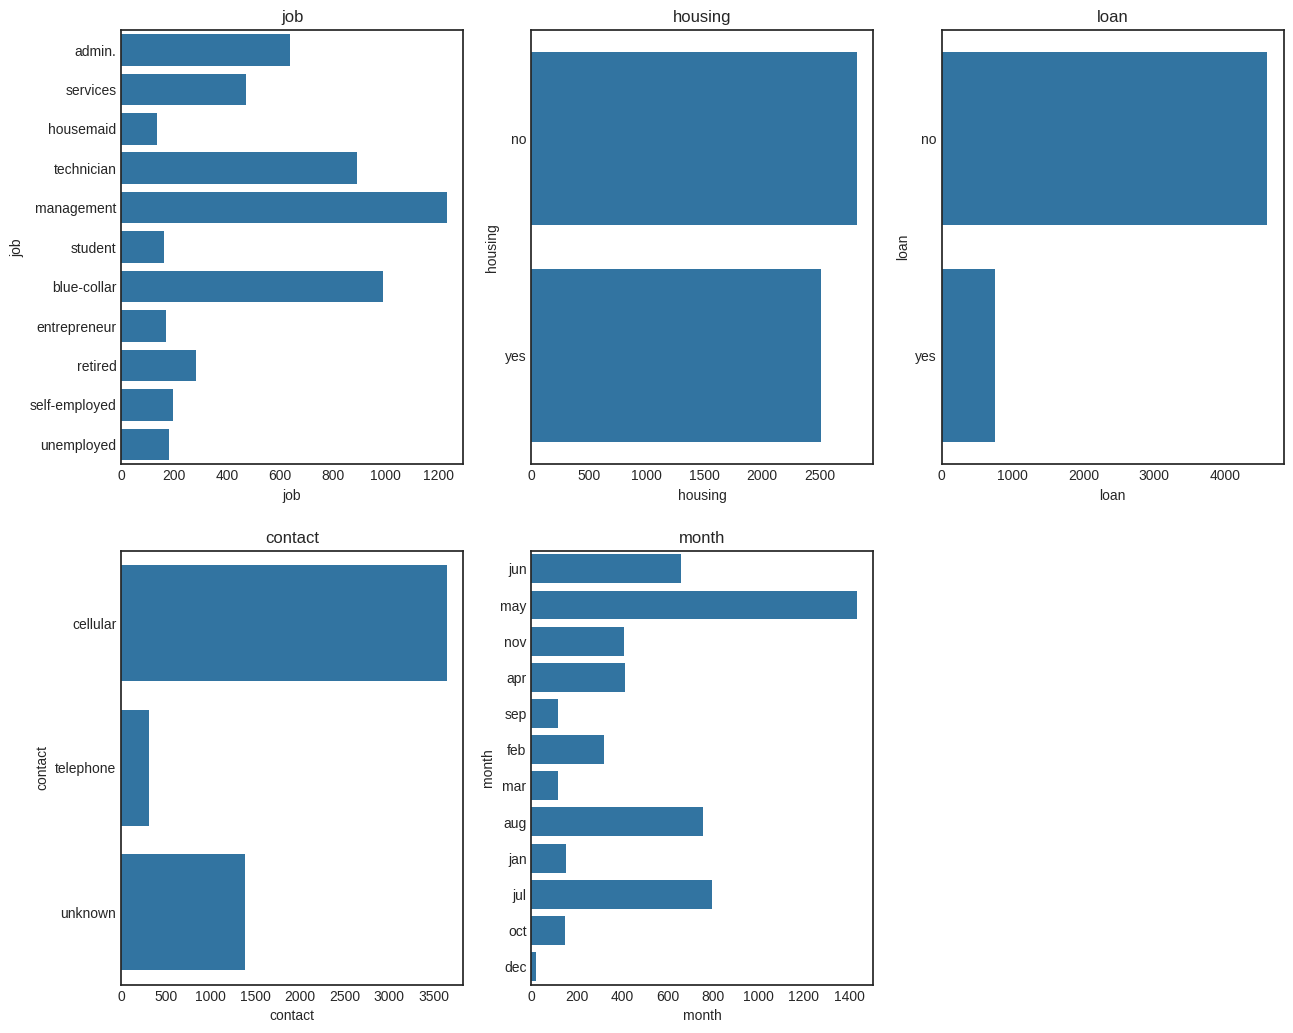

In [36]:
#check count based on categorical features
plt.figure(figsize=(15,80), facecolor='white')
plotnumber =1
for categorical_feature in categorical_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.countplot(y=categorical_feature,data=df)
    plt.xlabel(categorical_feature)
    plt.title(categorical_feature)
    plotnumber+=1
plt.show()

- Nasabah terbanyak adalah dengan profesi manajemen dan blue clollar.
- Nasabah dari bank X kebanyakan tidak cicilan KPR rumah.
- Nasabah yang memiliki cicilan pinjaman juga sedikit.
- Nasabah rata-rata dihubungi melalui telepon seluler.
- Data nasabah yang dikontak di bulan Mei tinggi dan yang paling sedikit di bulan Desember.
- Tingkat keberhasilan kampanye sebelumnya tidak dapat dideteksi.

**Relationship between Categorical Features and Label**

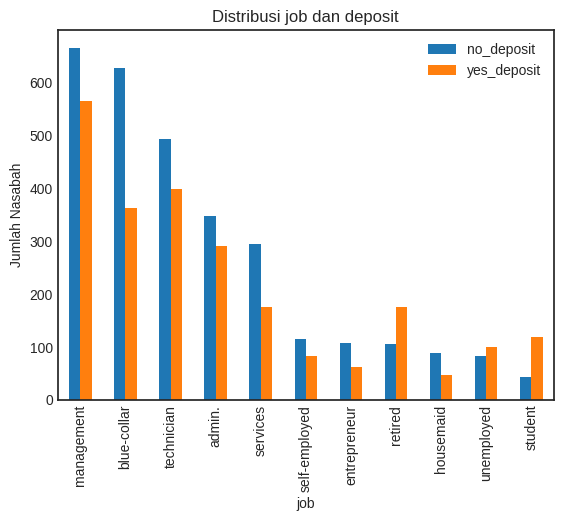

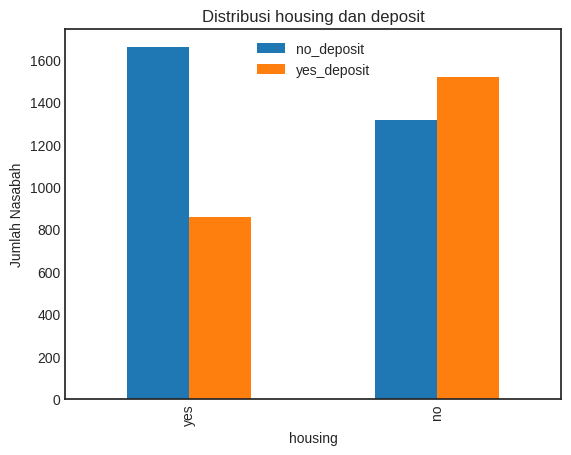

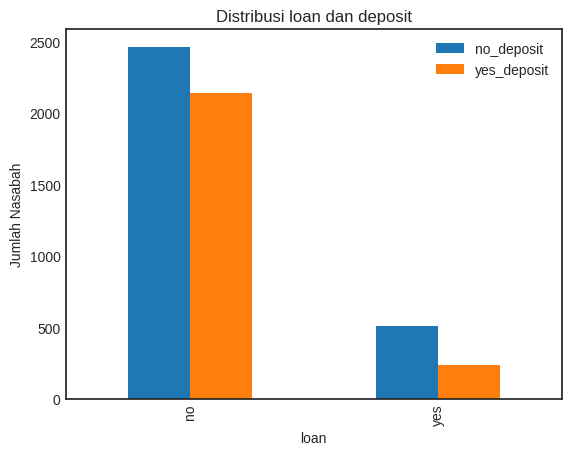

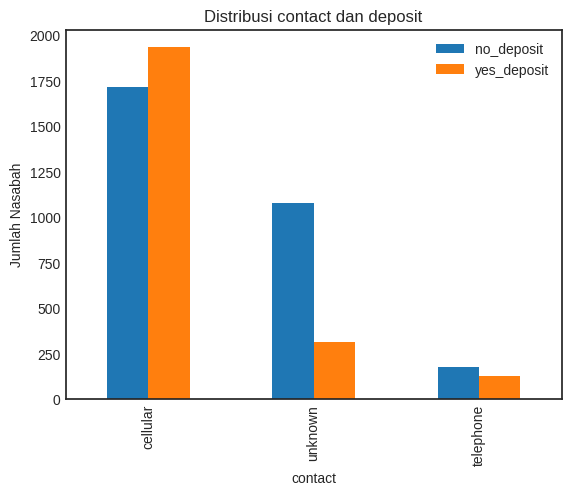

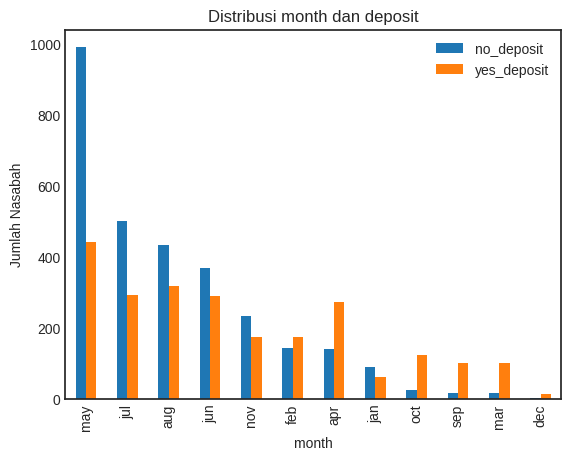

In [37]:
# Fungsi untuk plot distribusi nilai-nilai kategorikal dalam masing-masing kelompok "deposit" dan "no deposit"
def plot_bar(column):
    temp_df = pd.DataFrame()
    temp_df['no_deposit'] = df[df['deposit'] == 0][column].value_counts()
    temp_df['yes_deposit'] = df[df['deposit'] == 1][column].value_counts()
    temp_df.plot(kind='bar')
    plt.xlabel(column)
    plt.ylabel('Jumlah Nasabah')
    plt.title('Distribusi {} dan deposit'.format(column))
    plt.show()

# Plot distribusi untuk setiap fitur kategorikal
for feature in categorical_features:
    plot_bar(feature)



Dari beberapa fitur kategorikal didapatkan beberapa insight berikut:

1. Dari semua profesi nasabah, yang paling cendrung yang memiliki rekening deposito adalah dari nasabah dengan profesi management, blue collar, dan techinician. Namun menariknya, nasabah yang sudah pensiun, nasabah yang statusnya masih student dan nasabah yang tidak memiliki pekerjaan malah lebih tertarik untuk melakukan deposito.
Data ini tidak seluruhnya riil, bisa jadi data nasabah yang tidak dilakukan pembaharuan.

2. Pada kategori kepemilikan rumah, nasabah yang mempunyai KPR atau utang rumah cenderung tidak membuka rekening deposito. Sedangkan nasabah yang tidak memiliki KPR atau utang rumah lebih cenderung membuka rekening deposito.

3. Pada kategori kepemilikan pinjaman priba (loan), nasabah yang tidak memiliki pinjaman pribadi  memiliki rekening deposito (jumlah nasabah hampir sama). Namun bagi nasabah yang memiliki pinjaman pribadi, kecenderungannya adalah tidak membuka rekening deposito.

4. Profesi, kepemilikan rumah, dan pinjaman pribadi, dapat dianggap sebagai bagian dari faktor keuangan yang mempengaruhi keputusan nasabah untuk membuka rekening deposito. Pola ini menunjukkan bahwa nasabah cenderung mempertimbangkan komitmen finansial dan risiko ketika memutuskan berinvestasi pada deposito.


Mencari distribusi dari fitur numerik kontinu (Continuous Numerical Features) dari satu set data berguna untuk memahami sebaran atau pola dari nilai-nilai dalam fitur tersebut. Hal ini membantu dalam mengetahui karakteristik dari data yang sedang dianalisis, seperti apakah data memiliki kecenderungan tertentu, apakah terdapat pencilan (outlier), dan bagaimana persebaran nilai-nilai tersebut.

Dengan memahami distribusi fitur numerik kontinu, kita dapat mengambil kesimpulan tentang berbagai aspek data, seperti kecenderungan umum, variasi, dan kepadatan nilai-nilai. Ini membantu dalam pengambilan keputusan analitis lebih lanjut, termasuk pemilihan model, pengelompokan data, atau deteksi anomali.

Misalnya, dalam konteks data bank marketing, mencari distribusi dari fitur numerik seperti saldo rekening pelanggan dapat membantu kita memahami pola-pola kekayaan pelanggan, melihat apakah ada kelompok pelanggan dengan saldo yang lebih tinggi cenderung melakukan deposito, atau mengetahui apakah ada outlier yang perlu diperhatikan.

Jadi, mencari distribusi dari fitur numerik kontinu adalah langkah awal yang penting dalam eksplorasi data dan membantu dalam pengambilan keputusan yang lebih baik dalam analisis data.

Explore the Correlation between numerical features**

<ipython-input-38-5d23cbbceaed>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


<Axes: >

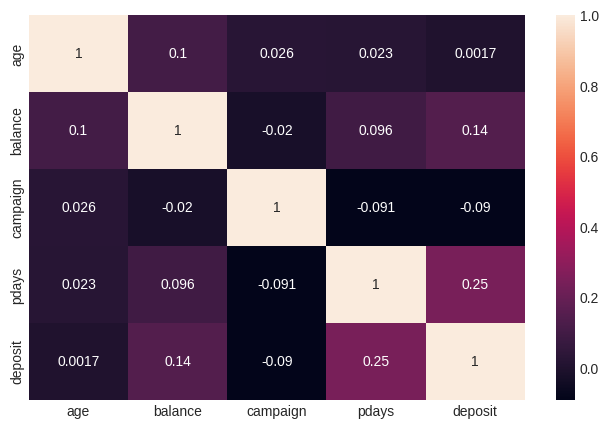

In [38]:
## Checking for correlation
corr = df.corr()
fig = plt.figure(figsize=(8,5))
sns.heatmap(corr,annot=True)

Fitur yang paling erat hubungannya dengan label (deposit) adalah pdays dan balance. Ini menunjukkan bahwa variabel pdays (jumlah hari sejak kontak terakhir dengan klien dari kampanye pemasaran sebelumnya) dan variabel saldo rekening rata-rata (balance) memiliki korelasi yang lebih kuat dengan keputusan nasabah untuk membuka rekening deposito daripada nasabah lainnya.

In [39]:
df['deposit'].groupby(df['deposit']).count()

deposit
0    2968
1    2375
Name: deposit, dtype: int64

In [40]:
# Cetak nilai maksimum dan minimum dari kolom "balance"
max_balance = df['balance'].max()
min_balance = df['balance'].min()

print("Nilai maksimum balance:", max_balance)
print("Nilai minimum balance:", min_balance)

Nilai maksimum balance: 4017
Nilai minimum balance: -1965


Melakukan binning pada fitur dataset kategorikal menjadi numerikal https://towardsdatascience.com/data-preprocessing-with-python-pandas-part-5-binning-c5bd5fd1b950

In [41]:
import pandas as pd

# Contoh data balance
df.balance

# Tentukan jumlah bin dan rentang nilai untuk setiap bin
num_bins = 4
bin_ranges = [-2000, 0, 2000, 5000, float('inf')]  # Gunakan float('inf') untuk nilai tak terbatas

# Lakukan binning menggunakan pd.cut
balance_bins = pd.cut(df.balance, bins=bin_ranges, labels=['Very Low','Low', 'Medium', 'High'])

# Tampilkan hasil binning
print(balance_bins)


0            Low
3       Very Low
4            Low
5       Very Low
7            Low
          ...   
7804         Low
7807    Very Low
7808         Low
7811         Low
7812         Low
Name: balance, Length: 5343, dtype: category
Categories (4, object): ['Very Low' < 'Low' < 'Medium' < 'High']


In [42]:
# Gabungkan balance_bins dengan DataFrame df
df = df.assign(balance_bins=balance_bins)

# Tampilkan DataFrame df setelah penggabungan
print(df)


      age         job  balance housing loan    contact month  campaign  pdays  \
0      55      admin.     1662      no   no   cellular   jun         2     -1   
3      38    services      -87     yes   no   cellular   may         1     -1   
4      36   housemaid      205     yes   no  telephone   nov         4     -1   
5      41      admin.      -76     yes   no   cellular   apr         1     -1   
7      36  technician      911     yes  yes   cellular   may         2     21   
...   ...         ...      ...     ...  ...        ...   ...       ...    ...   
7804   52      admin.      423     yes  yes   cellular   oct         2     96   
7807   33  management        0     yes  yes   cellular   may         2     -1   
7808   62   housemaid        2      no   no   cellular   nov         1     -1   
7811   31      admin.       54     yes   no   cellular   nov         1     -1   
7812   60     retired     1588      no   no   cellular   oct         1     -1   

      deposit balance_bins 

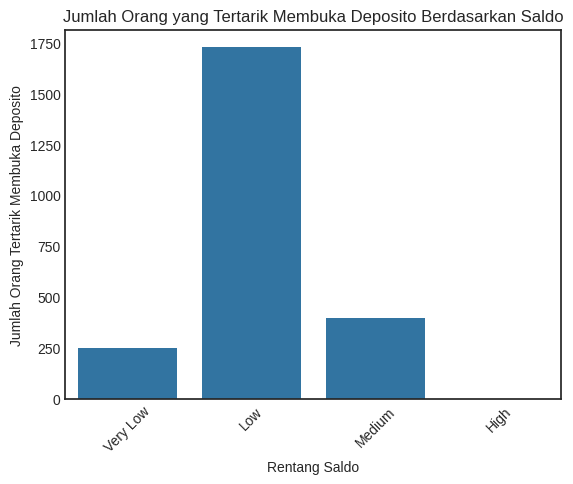

In [43]:
# Filter data hanya untuk deposit dengan nilai 1
df_deposit = df[df['deposit'] == 1]

# Hitung jumlah deposit untuk setiap rentang saldo
deposit_counts = df_deposit.groupby('balance_bins').size().reset_index(name='jumlah_deposit')

# Visualisasi menggunakan Seaborn
sns.barplot(x='balance_bins', y='jumlah_deposit', data=deposit_counts)
plt.title('Jumlah Orang yang Tertarik Membuka Deposito Berdasarkan Saldo')
plt.xlabel('Rentang Saldo')
plt.ylabel('Jumlah Orang Tertarik Membuka Deposito')
plt.xticks(rotation=45)
plt.show()

Nasabah yang cendrung tertarik membuka deposito adalah nasabah yang tidak memiliki saldo yang tinggi.

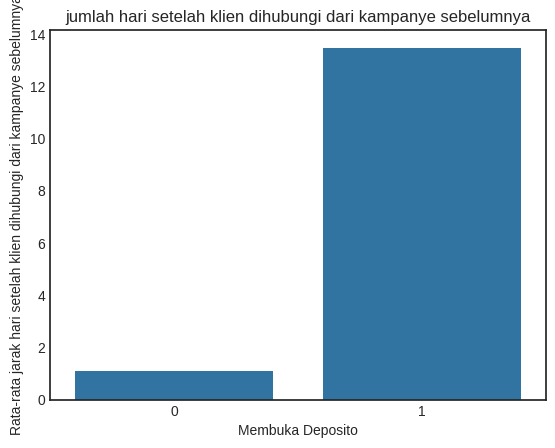

In [44]:
# Hitung rata-rata saldo rekening untuk setiap kelompok
average_balance = df.groupby('deposit')['pdays'].mean().reset_index()

# Visualisasi menggunakan Seaborn
sns.barplot(x='deposit', y='pdays', data=average_balance)
plt.title('jumlah hari setelah klien dihubungi dari kampanye sebelumnya')
plt.xlabel('Membuka Deposito')
plt.ylabel('Rata-rata jarak hari setelah klien dihubungi dari kampanye sebelumnya')
plt.show()

Terlihat bahwa semakin dekat jarak hari setelah klien dihubungi setelah campaign tidak membuat nasabah untuk tertarik membuka rekening deposito. Mungkin saja, nasabah masih dalam masa mempertimbangkan untuk membuka deposito atau tidak.

Melakukan kategorisasi umur:
Bayi dan balita < 5 tahun
Anak-anak 5 -9 tahun
Remaja 10 - 18 tahun
Dewasa 19 - 59 tahun
Lansia 60+ tahun

In [45]:
# Tentukan rentang nilai untuk setiap kelompok
age_ranges = [0, 9, 17, 59, float('inf')]  # Gunakan float('inf') untuk nilai tak terbatas

# Tentukan label untuk setiap kelompok
age_labels = ['Anak-anak', 'Remaja', 'Dewasa', 'Lansia']

# Lakukan binning menggunakan pd.cut
age_group = pd.cut(df.age, bins=age_ranges, labels=age_labels, right=False)

age_group

0       Dewasa
3       Dewasa
4       Dewasa
5       Dewasa
7       Dewasa
         ...  
7804    Dewasa
7807    Dewasa
7808    Lansia
7811    Dewasa
7812    Lansia
Name: age, Length: 5343, dtype: category
Categories (4, object): ['Anak-anak' < 'Remaja' < 'Dewasa' < 'Lansia']

In [46]:
# Gabungkan balance_bins dengan DataFrame df
df = df.assign(age_group=age_group)

# Tampilkan DataFrame df setelah penggabungan
print(df)

      age         job  balance housing loan    contact month  campaign  pdays  \
0      55      admin.     1662      no   no   cellular   jun         2     -1   
3      38    services      -87     yes   no   cellular   may         1     -1   
4      36   housemaid      205     yes   no  telephone   nov         4     -1   
5      41      admin.      -76     yes   no   cellular   apr         1     -1   
7      36  technician      911     yes  yes   cellular   may         2     21   
...   ...         ...      ...     ...  ...        ...   ...       ...    ...   
7804   52      admin.      423     yes  yes   cellular   oct         2     96   
7807   33  management        0     yes  yes   cellular   may         2     -1   
7808   62   housemaid        2      no   no   cellular   nov         1     -1   
7811   31      admin.       54     yes   no   cellular   nov         1     -1   
7812   60     retired     1588      no   no   cellular   oct         1     -1   

      deposit balance_bins 

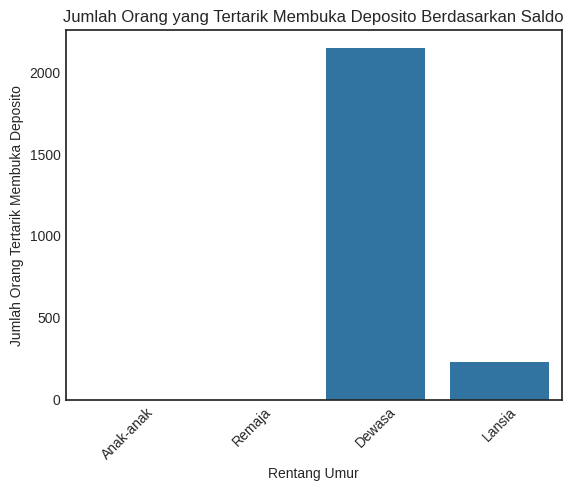

In [47]:
# Filter data hanya untuk deposit dengan nilai 1
df_deposit = df[df['deposit'] == 1]

# Hitung jumlah deposit untuk setiap rentang saldo
deposit_counts = df_deposit.groupby('age_group').size().reset_index(name='jumlah_deposit')

# Visualisasi menggunakan Seaborn
sns.barplot(x='age_group', y='jumlah_deposit', data=deposit_counts)
plt.title('Jumlah Orang yang Tertarik Membuka Deposito Berdasarkan Saldo')
plt.xlabel('Rentang Umur')
plt.ylabel('Jumlah Orang Tertarik Membuka Deposito')
plt.xticks(rotation=45)
plt.show()

Nasabah dengan rentang umur 30 - 40, lebih tertarik membuka deposito.

Binning untuk fitur `age` berdasarkan kategori umur yang ditentukan oleh Kementerian Kesehatan (https://ayosehat.kemkes.go.id/)

In [48]:
df = df.drop(['age', 'balance'], axis=1)

df

,job,housing,loan,contact,month,campaign,pdays,deposit,balance_bins,age_group
0,admin.,no,no,cellular,jun,2,-1,1,Low,Dewasa
3,services,yes,no,cellular,may,1,-1,0,Very Low,Dewasa
4,housemaid,yes,no,telephone,nov,4,-1,0,Low,Dewasa
5,admin.,yes,no,cellular,apr,1,-1,0,Very Low,Dewasa
7,technician,yes,yes,cellular,may,2,21,1,Low,Dewasa
...,...,...,...,...,...,...,...,...,...,...
7804,admin.,yes,yes,cellular,oct,2,96,0,Low,Dewasa
7807,management,yes,yes,cellular,may,2,-1,0,Very Low,Dewasa
7808,housemaid,no,no,cellular,nov,1,-1,1,Low,Lansia
7811,admin.,yes,no,cellular,nov,1,-1,0,Low,Dewasa


Dikarenakan fitur `balance` dan `age` sudah kita binning. Maka, fitur `age` dan `balance` yang sifatnya masih numerikal kita hapus saja.

## Data Preparation

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5343 entries, 0 to 7812
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   job           5343 non-null   object  
 1   housing       5343 non-null   object  
 2   loan          5343 non-null   object  
 3   contact       5343 non-null   object  
 4   month         5343 non-null   object  
 5   campaign      5343 non-null   int64   
 6   pdays         5343 non-null   int64   
 7   deposit       5343 non-null   int64   
 8   balance_bins  5343 non-null   category
 9   age_group     5343 non-null   category
dtypes: category(2), int64(3), object(5)
memory usage: 386.5+ KB


Explore Categorical Features dengan melakukan fitur encoding terhadap fitur kategorikal yang dimiliki. Yang akan kita lakukan adalah:

Categorical Columns:
1. Mengubah fitur `month`, `balance_bins` , `age_group` yang merupakan bulan dalam dataset. Ketiga fitur termasuk kategori data ordinal (yang memiliki urutan) sehingga metode encoding yang tepat adalah menggunakan ordinal encoding.
2. Mengubah fitur `job` dan `contact` menggunakan one hot encoding, karena fitur ini tidak ordinal, dan jumlah unique datanya hanya sedikit.
3. Mengubah fitur `loan` dan `housing` menggunakan label encoding, karena fitur ini tidak ordinal, dan jumlah unique datanya terdiri dari 2 kategori yaitu yes and no.

In [50]:
# Definisikan ordinal mapping untuk fitur `month`, `balance` dan `age`
ordinal_mapping= [
                ["jan", "feb", "mar", "apr", "may", "jun",
                   "jul", "aug", "sep", "oct", "nov","dec"],
                 ["Very Low", "Low", "Medium", "High"],
                  ["Anak-anak", "Remaja", "Dewasa", "Lansia"]
]


In [51]:
# Definisikan transformer
transformer = ColumnTransformer([
     ('onehot',  OneHotEncoder(drop= "first", sparse_output = False), ['job','contact']),
     ('ordinal', OrdinalEncoder(categories=ordinal_mapping), ['month','balance_bins','age_group']),
     ('label_encode', OrdinalEncoder(),['loan','housing']),
 ], remainder='passthrough')

In [90]:
X = df.drop(columns=['deposit'])
y = df['deposit']


In [91]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size= 0.3,
    stratify= y,
    random_state= 42)

In [92]:
X_train

,job,housing,loan,contact,month,campaign,pdays,balance_bins,age_group
5488,admin.,no,yes,cellular,apr,3,-1,Low,Dewasa
2470,housemaid,no,no,cellular,aug,2,-1,Medium,Dewasa
2155,admin.,no,no,unknown,may,1,-1,Low,Dewasa
1097,management,yes,no,cellular,nov,6,-1,Medium,Dewasa
1776,management,no,no,cellular,aug,2,-1,Medium,Lansia
...,...,...,...,...,...,...,...,...,...
1688,housemaid,no,no,telephone,jul,1,-1,Low,Dewasa
4908,self-employed,no,no,cellular,oct,1,-1,Low,Dewasa
5277,retired,yes,no,cellular,jul,2,-1,Very Low,Dewasa
2493,management,no,no,cellular,sep,1,103,Low,Dewasa


In [55]:
trf = transformer.fit_transform(X_train)
trf

array([[  0.,   0.,   0., ...,   0.,   3.,  -1.],
       [  0.,   0.,   1., ...,   0.,   2.,  -1.],
       [  0.,   0.,   0., ...,   0.,   1.,  -1.],
       ...,
       [  0.,   0.,   0., ...,   1.,   2.,  -1.],
       [  0.,   0.,   0., ...,   0.,   1., 103.],
       [  0.,   0.,   1., ...,   1.,   5.,  -1.]])

In [56]:
testing = pd.DataFrame(trf, columns= transformer.get_feature_names_out())
testing

,onehot__job_blue-collar,onehot__job_entrepreneur,onehot__job_housemaid,onehot__job_management,onehot__job_retired,onehot__job_self-employed,onehot__job_services,onehot__job_student,onehot__job_technician,onehot__job_unemployed,onehot__contact_telephone,onehot__contact_unknown,ordinal__month,ordinal__balance_bins,ordinal__age_group,label_encode__loan,label_encode__housing,remainder__campaign,remainder__pdays
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,2.0,1.0,0.0,3.0,-1.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,2.0,2.0,0.0,0.0,2.0,-1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4.0,1.0,2.0,0.0,0.0,1.0,-1.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,2.0,2.0,0.0,1.0,6.0,-1.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,2.0,3.0,0.0,0.0,2.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3735,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,6.0,1.0,2.0,0.0,0.0,1.0,-1.0
3736,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,1.0,2.0,0.0,0.0,1.0,-1.0
3737,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,2.0,0.0,1.0,2.0,-1.0
3738,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,1.0,2.0,0.0,0.0,1.0,103.0


In [57]:
testing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3740 entries, 0 to 3739
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   onehot__job_blue-collar    3740 non-null   float64
 1   onehot__job_entrepreneur   3740 non-null   float64
 2   onehot__job_housemaid      3740 non-null   float64
 3   onehot__job_management     3740 non-null   float64
 4   onehot__job_retired        3740 non-null   float64
 5   onehot__job_self-employed  3740 non-null   float64
 6   onehot__job_services       3740 non-null   float64
 7   onehot__job_student        3740 non-null   float64
 8   onehot__job_technician     3740 non-null   float64
 9   onehot__job_unemployed     3740 non-null   float64
 10  onehot__contact_telephone  3740 non-null   float64
 11  onehot__contact_unknown    3740 non-null   float64
 12  ordinal__month             3740 non-null   float64
 13  ordinal__balance_bins      3740 non-null   float

Dalam data preparation ada yang namanya feature scalling.
Feature scalling ini berguna untuk menormalkan rentang variabel independen https://www.scaler.com/topics/machine-learning/feature-scaling-in-machine-learning/

Namun sebelum melakukan scalling, kita harus menentukan metode scaler mana yang cocok untuk data kita dengan memeriksa apakah data kita terdistribusi normal atau tidak dan juga apakah data kita memiliki outlier atau tidak (sudah di cek sebelumnya).

**Metode scaler mana yang cocok?**

In [58]:
df.value_counts()

job          housing  loan  contact   month  campaign  pdays  deposit  balance_bins  age_group
blue-collar  yes      no    unknown   may    1         -1     0        Low           Dewasa       47
                                             2         -1     0        Low           Dewasa       44
management   no       no    cellular  aug    2         -1     0        Low           Dewasa       37
admin.       yes      no    unknown   may    1         -1     0        Low           Dewasa       35
technician   yes      no    unknown   may    1         -1     0        Low           Dewasa       31
                                                                                                  ..
management   no       no    cellular  jul    2         -1     0        Very Low      Dewasa        1
                                                                       Medium        Dewasa        1
                                                              1        Very Low      Dewasa      

In [59]:
from scipy.stats import shapiro

# Menggunakan kolom "balance" sebagai contoh
_, pvalue = shapiro(df['pdays'])

if (pvalue > 0.05):
    print(("The feature is normal distribution"))
else:
    print(("The feature is not normal distribution"))

The feature is not normal distribution


/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Karena data lebih dari > 5000 maka, tidak direkomendasikan menggunakan metode shapiro. Penggunaan Kolmogorov-Smirnov test sebagai alternatif untuk menguji normalitas data dengan jumlah dataset > 5000.

source:

https://stats.stackexchange.com/questions/137830/how-do-you-interpret-kolmogorov-smirnov-test-results-in-r

In [60]:
features_list = df.columns
features_list

Index(['job', 'housing', 'loan', 'contact', 'month', 'campaign', 'pdays',
       'deposit', 'balance_bins', 'age_group'],
      dtype='object')

In [61]:
from scipy.stats import kstest

for feature in features_list:
    if df[feature].dtype in ['int64', 'float64']:  # Memeriksa apakah tipe data kolom numerik
        _, pvalue = kstest(df[feature], 'norm')

        if (pvalue > 0.05):
            print(f"Feature {feature} is normally distributed")
        else:
            print(f"Feature {feature} is not normally distributed")
    else:
        print(f"Skipping {feature} as it is not numeric")



Skipping job as it is not numeric
Skipping housing as it is not numeric
Skipping loan as it is not numeric
Skipping contact as it is not numeric
Skipping month as it is not numeric
Feature campaign is not normally distributed
Feature pdays is not normally distributed
Feature deposit is not normally distributed
Skipping balance_bins as it is not numeric
Skipping age_group as it is not numeric


In [62]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()

## Modeling and Evaluation

Dalam supervised learning metode klasifikasi kita gunakan di semua metode untuk mencari metode yang terbaik yaitu
1. Logistic Regression
2. K-Nearest Neighbors (KNN)
3. Decision Trees
4. Random Forest
5. Extreme Gradient Boosting (XGB)
6. Light Gradient Boosting Machine (LGBM)


In [63]:
logreg = LogisticRegression()
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
xgb = XGBClassifier()
lgbm = lgb.LGBMClassifier()

In [64]:

from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.pipeline import Pipeline
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import lightgbm as lgb

### Model Benchmarking : K-Fold

In [65]:
models = [logreg,knn,dt,rf,xgb,lgbm]
score=[]
rata=[]
std=[]

for i in models:
    skfold=StratifiedKFold(n_splits=5)
    estimator=Pipeline([
        ('preprocess',transformer),
        ('scaler', scaler),
        ('model',i)
        ])

    model_cv =cross_val_score(estimator, X_train,y_train,cv=skfold,scoring='roc_auc', error_score='raise')
    score.append(model_cv)
    rata.append(model_cv.mean())
    std.append(model_cv.std())

pd.DataFrame({'model':['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'XGBoost', 'LightGBM'],'mean roc_auc':rata,'sdev':std}).set_index('model').sort_values(by='mean roc_auc',ascending=False)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

[LightGBM] [Info] Number of positive: 1329, number of negative: 1663
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000763 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 88
[LightGBM] [Info] Number of data points in the train set: 2992, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.444184 -> initscore=-0.224196
[LightGBM] [Info] Start training from score -0.224196
[LightGBM] [Info] Number of positive: 1329, number of negative: 1663
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000347 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 89
[LightGBM] [Info] Number of data points in the train set: 2992, number of used features: 19
[LightGBM] [Info] [binary:Bo

,mean roc_auc,sdev
model,,
LightGBM,0.741013,0.008670
XGBoost,0.725275,0.008291
Logistic Regression,0.724998,0.012142
Random Forest,0.702064,0.011769
KNN,0.673979,0.011097
Decision Tree,0.651270,0.016125


Terlihat bahwa model LightGBM adalah yang terbaik untuk roc_aucnya dari setiap model yang menggunakan default hyperparameter.

### Model Benchmarking : Test Data

In [66]:
!pip install --upgrade scikit-learn


In [67]:
from sklearn.metrics import roc_auc_score
import time


In [68]:
models = [logreg, knn, dt, rf, xgb, lgbm]
score_roc_auc = []
computation_times = []

def y_pred_func(i):
    start_time = time.time()  # Catat waktu awal komputasi
    estimator = Pipeline([
        ('preprocess', transformer),
        ('model', i)])
    estimator.fit(X_train, y_train)
    y_pred = estimator.predict(X_test)
    end_time = time.time()  # Catat waktu akhir komputasi
    computation_time = end_time - start_time  # Hitung waktu komputasi
    computation_times.append(computation_time)  # Simpan waktu komputasi
    return estimator, y_pred

for i, j in zip(models, ['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'XGBoost', 'LightGBM']):
    estimator, y_pred = y_pred_func(i)
    y_predict_proba = estimator.predict_proba(X_test)[:, 1]
    score_roc_auc.append(roc_auc_score(y_test, y_predict_proba))
    print(j, '\n', classification_report(y_test, y_pred))

results_df = pd.DataFrame({'model': ['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'XGBoost', 'LightGBM'],
                           'roc_auc score': score_roc_auc,
                           'computation_time (s)': computation_times})
results_df.set_index('model').sort_values(by='roc_auc score', ascending=False)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression 
               precision    recall  f1-score   support

           0       0.67      0.77      0.72       890
           1       0.65      0.53      0.59       713

    accuracy                           0.67      1603
   macro avg       0.66      0.65      0.65      1603
weighted avg       0.67      0.67      0.66      1603

KNN 
               precision    recall  f1-score   support

           0       0.69      0.73      0.71       890
           1       0.63      0.58      0.61       713

    accuracy                           0.67      1603
   macro avg       0.66      0.66      0.66      1603
weighted avg       0.66      0.67      0.66      1603

Decision Tree 
               precision    recall  f1-score   support

           0       0.66      0.75      0.71       890
           1       0.63      0.52      0.57       713

    accuracy                           0.65      1603
   macro avg       0.65      0.64      0.64      1603
weighted avg       0.65      0

,roc_auc score,computation_time (s)
model,,
LightGBM,0.737936,0.244837
XGBoost,0.735407,0.129502
Logistic Regression,0.720033,0.097353
Random Forest,0.695936,0.501499
KNN,0.693088,0.110447
Decision Tree,0.650394,0.040585


Terlihat kembali lagi model LightGBM adalah yang terbaik performanya pada test data dengan skor roc_auc terbaik. Selain melihat score roc_auc dari masing-masing model, kita juga dapat melihat waktu komputasi dari masing-masing model.

Model LightGBM dengan nilai roc_auc tinggi, waktu komputasinya bukan yang tercepat yang tercepat adalah decision tree. Namun, dalam model ini kita ingin mendapatkan akurasi yang tinggi agar memperoleh prediksi yang tepat untuk nasabah yang tertarik membuka rekening atau tidak agar biaya campaign dapat diefisiensi

Selanjutnya, mari sekarang kita coba melakukan oversampling untuk model LightGBM kita untuk melihat apakah kita dapat mendapatkan hasil yang lebih baik lagi.


### Test Oversampling with K-Fold Cross Validation

K-fold cross validation adalah salah satu pendekatan yang umum digunakan dalam evaluasi kinerja model dalam machine learning. Ini adalah teknik validasi silang yang membagi data menjadi k subset, di mana setiap subset digunakan secara bergantian sebagai data test  sementara sisanya digunakan sebagai data train. Prosedur ini diulang k kali sehingga setiap subset digunakan sebagai data uji tepat satu kali.


Referensi:
1. https://machinelearningmastery.com/k-fold-cross-validation/
2. https://scikit-learn.org/stable/modules/cross_validation.html

In [69]:
def calc_train_error(X_train, y_train, model):
#     '''returns in-sample error for already fit model.'''
    predictions = model.predict(X_train)
    predictProba = model.predict_proba(X_train)
    accuracy = accuracy_score(y_train, predictions)
    f1 = f1_score(y_train, predictions, average='macro')
    roc_auc = roc_auc_score(y_train, predictProba[:,1])
    recall = recall_score(y_train, predictions)
    precision = precision_score(y_train, predictions)
    report = classification_report(y_train, predictions)
    return {
        'report': report,
        'f1' : f1,
        'roc': roc_auc,
        'accuracy': accuracy,
        'recall': recall,
        'precision': precision
    }

def calc_validation_error(X_test, y_test, model):
#     '''returns out-of-sample error for already fit model.'''
    predictions = model.predict(X_test)
    predictProba = model.predict_proba(X_test)
    accuracy = accuracy_score(y_test, predictions)
    f1 = f1_score(y_test, predictions, average='macro')
    roc_auc = roc_auc_score(y_test, predictProba[:,1])
    recall = recall_score(y_test, predictions)
    precision = precision_score(y_test, predictions)
    report = classification_report(y_test, predictions)
    return {
        'report': report,
        'f1' : f1,
        'roc': roc_auc,
        'accuracy': accuracy,
        'recall': recall,
        'precision': precision
    }

def calc_metrics(X_train, y_train, X_test, y_test, model):
#     '''fits model and returns the in-sample error and out-of-sample error'''
    model.fit(X_train, y_train)
    train_error = calc_train_error(X_train, y_train, model)
    validation_error = calc_validation_error(X_test, y_test, model)
    return train_error, validation_error

In [70]:
from sklearn.model_selection import StratifiedKFold

K = 10
kf = StratifiedKFold(n_splits=K, shuffle=True, random_state=42)

In [71]:
data = X_train
target = y_train

In [72]:
!pip install imbalanced-learn
!pip install --upgrade scikit-learn imbalanced-learn
!pip install scikit-learn==<version>


/bin/bash: -c: line 1: syntax error near unexpected token `newline'
/bin/bash: -c: line 1: `pip install scikit-learn==<version>'


In [73]:
from imblearn.over_sampling import RandomOverSampler


In [74]:
train_errors_without_oversampling = []
validation_errors_without_oversampling = []

train_errors_with_oversampling = []
validation_errors_with_oversampling = []

for train_index, val_index in kf.split(data, target):

    # split data
    X_train, X_val = data.iloc[train_index], data.iloc[val_index]
    Y_train, Y_val = target.iloc[train_index], target.iloc[val_index]

#     print(len(X_val), (len(X_train) + len(X_val)))
    ros = RandomOverSampler()

    X_ros, Y_ros = ros.fit_resample(X_train, Y_train)

    # instantiate model
    lgbm = lgb.LGBMClassifier()
    estimator=Pipeline([
        ('preprocess',transformer),
        ('model',lgbm)
    ])

    #calculate errors
    train_error_without_oversampling, val_error_without_oversampling = calc_metrics(X_train, Y_train, X_val, Y_val, estimator)
    train_error_with_oversampling, val_error_with_oversampling = calc_metrics(X_ros, Y_ros, X_val, Y_val, estimator)

    # append to appropriate list
    train_errors_without_oversampling.append(train_error_without_oversampling)
    validation_errors_without_oversampling.append(val_error_without_oversampling)

    train_errors_with_oversampling.append(train_error_with_oversampling)
    validation_errors_with_oversampling.append(val_error_with_oversampling)

[LightGBM] [Info] Number of positive: 1495, number of negative: 1871
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000985 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 93
[LightGBM] [Info] Number of data points in the train set: 3366, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.444147 -> initscore=-0.224347
[LightGBM] [Info] Start training from score -0.224347
[LightGBM] [Info] Number of positive: 1871, number of negative: 1871
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000639 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 95
[LightGBM] [Info] Number of data points in the train set: 3742, number of used features: 19
[LightGBM] [Info] [binary:Bo

#### Evaluation Metrics Without Oversampling

In [75]:
listItem = []

for tr,val in zip(train_errors_without_oversampling,validation_errors_without_oversampling) :
    listItem.append([tr['accuracy'],val['accuracy'],tr['roc'],val['roc'],tr['f1'],val['f1'],
                     tr['recall'],val['recall'],tr['precision'],val['precision']])

listItem.append(list(np.mean(listItem,axis=0)))

dfEvaluate = pd.DataFrame(listItem,
                    columns=['Train Accuracy',
                            'Test Accuracy',
                            'Train ROC AUC',
                            'Test ROC AUC',
                            'Train F1 Score',
                            'Test F1 Score',
                            'Train Recall',
                            'Test Recall',
                            'Train Precision',
                            'Test Precision'])

listIndex = list(dfEvaluate.index)
listIndex[-1] = 'Average'
dfEvaluate.index = listIndex
dfEvaluate

,Train Accuracy,Test Accuracy,Train ROC AUC,Test ROC AUC,Train F1 Score,Test F1 Score,Train Recall,Test Recall,Train Precision,Test Precision
0,0.767677,0.695187,0.846854,0.745784,0.757913,0.682058,0.638127,0.550898,0.798326,0.702290
1,0.765300,0.711230,0.842771,0.753638,0.754371,0.700116,0.624080,0.580838,0.803618,0.718519
2,0.765894,0.700535,0.844975,0.754475,0.755994,0.685412,0.635027,0.542169,0.796980,0.714286
3,0.766191,0.684492,0.849239,0.717157,0.755591,0.660199,0.627674,0.469880,0.803251,0.722222
4,0.771539,0.684492,0.851417,0.707947,0.761548,0.670902,0.637701,0.542169,0.807790,0.681818
5,0.771539,0.692513,0.844071,0.735403,0.762661,0.682936,0.650401,0.584337,0.798195,0.678322
6,0.767677,0.756684,0.843093,0.784827,0.757175,0.747588,0.629679,0.638554,0.805128,0.773723
7,0.773321,0.713904,0.847323,0.754257,0.764681,0.703208,0.654412,0.590361,0.799184,0.715328
8,0.768865,0.676471,0.849880,0.708671,0.758665,0.665743,0.633690,0.560241,0.804754,0.659574
9,0.764409,0.700535,0.840929,0.760701,0.752136,0.677477,0.609626,0.487952,0.813559,0.750000


#### Evaluation Metrics With Oversampling

In [76]:
listItem = []

for tr,val in zip(train_errors_with_oversampling,validation_errors_with_oversampling) :
    listItem.append([tr['accuracy'],val['accuracy'],tr['roc'],val['roc'],tr['f1'],val['f1'],
                     tr['recall'],val['recall'],tr['precision'],val['precision']])

listItem.append(list(np.mean(listItem,axis=0)))

dfEvaluate = pd.DataFrame(listItem,
                    columns=['Train Accuracy',
                            'Test Accuracy',
                            'Train ROC AUC',
                            'Test ROC AUC',
                            'Train F1 Score',
                            'Test F1 Score',
                            'Train Recall',
                            'Test Recall',
                            'Train Precision',
                            'Test Precision'])

listIndex = list(dfEvaluate.index)
listIndex[-1] = 'Average'
dfEvaluate.index = listIndex
dfEvaluate

,Train Accuracy,Test Accuracy,Train ROC AUC,Test ROC AUC,Train F1 Score,Test F1 Score,Train Recall,Test Recall,Train Precision,Test Precision
0,0.767504,0.687166,0.853757,0.745842,0.766462,0.680755,0.700695,0.610778,0.808760,0.662338
1,0.758685,0.695187,0.845922,0.749703,0.757713,0.690505,0.695350,0.640719,0.796206,0.664596
2,0.762032,0.695187,0.849429,0.749233,0.761679,0.690505,0.723529,0.644578,0.783893,0.660494
3,0.764706,0.671123,0.855856,0.712958,0.763473,0.656566,0.692513,0.524096,0.809375,0.664122
4,0.771658,0.665775,0.860113,0.711104,0.770879,0.657246,0.713369,0.572289,0.807506,0.637584
5,0.772727,0.668449,0.856513,0.737894,0.771483,0.662416,0.698930,0.602410,0.819950,0.632911
6,0.764706,0.713904,0.851952,0.768232,0.764071,0.708483,0.712834,0.650602,0.795346,0.687898
7,0.761497,0.681818,0.850818,0.740558,0.760714,0.677556,0.704278,0.638554,0.795290,0.642424
8,0.770588,0.647059,0.856872,0.702068,0.769702,0.640101,0.708556,0.572289,0.808913,0.608974
9,0.761230,0.697861,0.851036,0.756154,0.760284,0.687843,0.698396,0.584337,0.798777,0.687943


Dari data tersebut, terlihat bahwa hasil kelas positifnya lebih baik (dilihat dari nilai recall) ketika dilakukan oversampling dan untuk tingkat presisinya pun kurang lebih sama (tidak memburuk dan tidak membaik).

#### Classification Reports Without Oversampling

In [77]:
for rep in validation_errors_without_oversampling :
    print(rep['report'])

              precision    recall  f1-score   support

           0       0.69      0.81      0.75       207
           1       0.70      0.55      0.62       167

    accuracy                           0.70       374
   macro avg       0.70      0.68      0.68       374
weighted avg       0.70      0.70      0.69       374

              precision    recall  f1-score   support

           0       0.71      0.82      0.76       207
           1       0.72      0.58      0.64       167

    accuracy                           0.71       374
   macro avg       0.71      0.70      0.70       374
weighted avg       0.71      0.71      0.71       374

              precision    recall  f1-score   support

           0       0.69      0.83      0.75       208
           1       0.71      0.54      0.62       166

    accuracy                           0.70       374
   macro avg       0.70      0.68      0.69       374
weighted avg       0.70      0.70      0.69       374

              preci

#### Classification Reports With Oversampling

In [78]:
for rep in validation_errors_with_oversampling :
    print(rep['report'])

              precision    recall  f1-score   support

           0       0.70      0.75      0.73       207
           1       0.66      0.61      0.64       167

    accuracy                           0.69       374
   macro avg       0.68      0.68      0.68       374
weighted avg       0.69      0.69      0.69       374

              precision    recall  f1-score   support

           0       0.72      0.74      0.73       207
           1       0.66      0.64      0.65       167

    accuracy                           0.70       374
   macro avg       0.69      0.69      0.69       374
weighted avg       0.69      0.70      0.69       374

              precision    recall  f1-score   support

           0       0.72      0.74      0.73       208
           1       0.66      0.64      0.65       166

    accuracy                           0.70       374
   macro avg       0.69      0.69      0.69       374
weighted avg       0.69      0.70      0.69       374

              preci

Terlihat bahwa model yang setelah di oversampling memiliki recall dari kedua class yang lebih seimbang. Oleh karena itu untuk kasus kali ini, mari kita gunakan model yang menggunakan oversampling (menggunakan asumsi yang kedua (yaitu kita membutuhkan kandidat potensial yang lebih banyak)).

Sekarang mari kita coba melakukan hyperparameter tuning pada model LightGBM kita untuk mendapatkan hasil yang lebih baik lagi.

In [79]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n",confusion_matrix)

Confusion Matrix:
 [[717 173]
 [319 394]]


The Confusion matrix result is telling us that we have 717+319 correct predictions and 173+394 incorrect predictions.

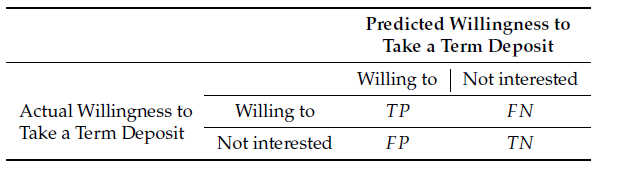

Referensi:
Ghatasheh, dkk. 2020. Business Analytics in Telemarketing: Cost-Sensitive Analysis of Bank Campaigns Using Artificial Neural Networks (https://doi.org/10.3390/app10072581)

### Hyperparameter Tuning

Referensi:

1. https://www.geeksforgeeks.org/cross-validation-and-hyperparameter-tuning-of-lightgbm-model/
2. Diaz, Aditya dkk. 2023. Optimizing Bank Marketing Strategies Through Analysis Using Lightgbm.

In [93]:
from imblearn.pipeline import Pipeline

lgbm = lgb.LGBMClassifier()
ros = RandomOverSampler(random_state=42)

estimator=Pipeline([
    ('oversampling',ros),
    ('preprocess',transformer),
    ('model',lgbm)
])

Hyperparamater yang digunakan:

1. `model__learning_rate`: Ini adalah hyperparameter yang mengontrol laju pembelajaran dari model Lightbm yang digunakan. Laju pembelajaran (learning rate) adalah seberapa besar langkah yang diambil oleh algoritma optimisasi pada setiap iterasi untuk memperbarui bobot model. Rentang nilai yang digunakan adalah [0.1, 0.075, 0.125, 0.05], yang akan dicoba  empat nilai yang berbeda untuk hyperparameter ini selama proses tuning.

2. `model__estimators`: Ini adalah hyperparameter yang mengontrol jumlah estimator atau pohon dalam model ensemble. Jumlah estimator ini mempengaruhi kompleksitas model ensemble dan dapat memengaruhi kinerjanya. Rentang nilai yang dipakai adalah [100,200, 300, 400, 500, 600, 700, 800, 900, 1000].

In [97]:
hyperparam_space=[{
    'model__learning_rate': [0.1, 0.075, 0.125, 0.05],
    'model__n_estimators': [100,200, 300, 400, 500, 600, 700, 800, 900, 1000],

}]



In [98]:
grid = GridSearchCV(
    estimator=estimator,
    param_grid=hyperparam_space,
    scoring='roc_auc',
    cv=StratifiedKFold(n_splits=10, shuffle=True, random_state=42),
    n_jobs=1
)

In [99]:
grid.fit(X_train, y_train)
print(grid.best_score_)
print(grid.best_params_)


[LightGBM] [Info] Number of positive: 1871, number of negative: 1871
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000481 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 96
[LightGBM] [Info] Number of data points in the train set: 3742, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Number of positive: 1871, number of negative: 1871
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000515 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 95
[LightGBM] [Info] Number of data points in the train set: 3742, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[Lig

Dari hasil hyperparameter tuning untuk model LightGBM (LGBM) dengan parameter `learning_rate` dan `n_estimators` yang diberikan, ada satu kombinasi hyperparameter yang dianggap sebagai yang terbaik berdasarkan metrik evaluasi yang dipilih. Kombinasi hyperparameter tersebut adalah:

- `learning_rate`: 0.05
- `n_estimators`: 100

Ini berarti model LGBM yang dihasilkan akan memiliki `learning_rate` sebesar 0.05 dan `n_estimators` sebesar 100 untuk menyelesaikan masalah klasifikasi dalam model. Hal ini menunjukkan bahwa model yang lebih sederhana dengan `n_estimators` yang lebih rendah dapat menghasilkan hasil yang baik.

Namun, penting untuk dicatat bahwa hasil ini mungkin hanya berlaku untuk dataset dan permasalahan tertentu. Metrik evaluasi dan pemilihan hyperparameter yang dianggap sebagai yang terbaik sangat tergantung pada karakteristik data, tujuan analisis, dan kompleksitas masalah yang dihadapi.

Tetapi untuk kali ini hyperparameter tuning yang akan kita lakukan hanya sampai sini saja.

In [100]:
best_model = grid.best_estimator_
best_model.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 2078, number of negative: 2078
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000499 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 98
[LightGBM] [Info] Number of data points in the train set: 4156, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


Pipeline(steps=[('oversampling', RandomOverSampler(random_state=42)),
                ('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehot',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  ['job', 'contact']),
                                                 ('ordinal',
                                                  OrdinalEncoder(categories=[['jan',
                                                                              'feb',
                                                                              'mar',
                                                                              'apr',
                                                                              'may',
                                                                              'jun',
                                                                              'jul',
                                                                              'aug',
                                                                              'sep',
                                                                              'oct',
                                                                              'nov',
                                                                              'dec'],
                                                                             ['Very '
                                                                              'Low',
                                                                              'Low',
                                                                              'Medium',
                                                                              'High'],
                                                                             ['Anak-anak',
                                                                              'Remaja',
                                                                              'Dewasa',
                                                                              'Lansia']]),
                                                  ['month', 'balance_bins',
                                                   'age_group']),
                                                 ('label_encode',
                                                  OrdinalEncoder(),
                                                  ['loan', 'housing'])])),
                ('model', LGBMClassifier(learning_rate=0.05))])

In [101]:
estimator=Pipeline([
    ('oversampling',ros),
    ('preprocess',transformer),
    ('model',lgbm)
])
estimator.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 2078, number of negative: 2078
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000587 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 98
[LightGBM] [Info] Number of data points in the train set: 4156, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


Pipeline(steps=[('oversampling', RandomOverSampler(random_state=42)),
                ('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehot',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  ['job', 'contact']),
                                                 ('ordinal',
                                                  OrdinalEncoder(categories=[['jan',
                                                                              'feb',
                                                                              'mar',
                                                                              'apr',
                                                                              'may',
                                                                              'jun',
                                                                              'jul',
                                                                              'aug',
                                                                              'sep',
                                                                              'oct',
                                                                              'nov',
                                                                              'dec'],
                                                                             ['Very '
                                                                              'Low',
                                                                              'Low',
                                                                              'Medium',
                                                                              'High'],
                                                                             ['Anak-anak',
                                                                              'Remaja',
                                                                              'Dewasa',
                                                                              'Lansia']]),
                                                  ['month', 'balance_bins',
                                                   'age_group']),
                                                 ('label_encode',
                                                  OrdinalEncoder(),
                                                  ['loan', 'housing'])])),
                ('model', LGBMClassifier())])

In [102]:
y_pred_default = estimator.predict(X_test)
y_pred_proba_default = estimator.predict_proba(X_test)
y_pred_tuned = best_model.predict(X_test)
y_pred_proba_tuned = best_model.predict_proba(X_test)

roc_auc_default = roc_auc_score(y_test, y_pred_proba_default[:,1])
roc_auc_tuned = roc_auc_score(y_test, y_pred_proba_tuned[:,1])

print('ROC AUC Score Default LGBM : ', roc_auc_default)
print('ROC AUC Score Tuned LGBM : ', roc_auc_tuned)

ROC AUC Score Default LGBM :  0.7358226830767292
ROC AUC Score Tuned LGBM :  0.7436098460374742


Model LGBM yang sudah ditunning memiliki nilai ROC AUC yang lebih baik walaupun hanya naik sedikit saja.


In [103]:
report_default = classification_report(y_test, y_pred_default)
report_tuned = classification_report(y_test, y_pred_tuned)

print('Classification Report Default LGBM : \n', report_default)
print('Classification Report Tuned LGBM : \n', report_tuned)

Classification Report Default LGBM : 
               precision    recall  f1-score   support

           0       0.70      0.76      0.73       890
           1       0.66      0.59      0.63       713

    accuracy                           0.69      1603
   macro avg       0.68      0.68      0.68      1603
weighted avg       0.68      0.69      0.68      1603

Classification Report Tuned LGBM : 
               precision    recall  f1-score   support

           0       0.71      0.77      0.74       890
           1       0.68      0.60      0.63       713

    accuracy                           0.69      1603
   macro avg       0.69      0.68      0.69      1603
weighted avg       0.69      0.69      0.69      1603



Kembali lagi terlihat bahwa model LGBM setelah kita tuning hyperparameternya memiliki classification report yang lebih baik walaupun hanya lebih baik sedikit saja. Oleh karena itu kita akan menggunakan model LGBM yang sudah di tuned sebagai model akhir kita.

### Feature Importance

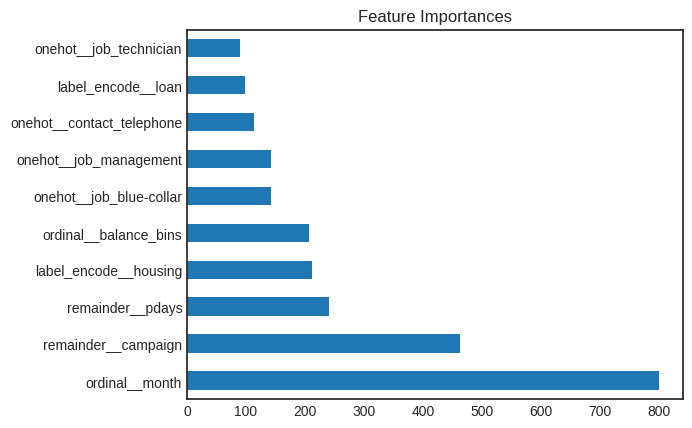

In [104]:
coef1 = pd.Series(best_model['model'].feature_importances_, transformer.get_feature_names_out()).sort_values(ascending = False).head(10)
coef1.plot(kind='barh', title='Feature Importances')
plt.show()

Dari bagian EDA dan pemilihan model, kita dapat dengan jelas mengidentifikasi bahwa saldo nasabah merupakan fitur penting dalam menentukan hasil dataset.

Sudah pasti bahwa semakin tertariknya prospek untuk memulai deposit memiliki pengaruh yang sangat kuat dari saldo nasabah. Kita juga telah menemukan usia nasabah berperan sebagai faktor penting memengaruhi hasil prediksi secara signifikan.

### Save Model

Menyimpan model menggunakan pickle agar dapat digunakan lagi di masa yang akan datang.

In [ ]:
import pickle

In [ ]:
best_model.fit(X, y)

filename = "/content/drive/MyDrive/Colab Notebooks/Bank Marketing Campaign Model.sav"
pickle.dump(best_model, open(filename , "wb"))


### Conclusion and Recommendation

In [105]:
print('Classification Report Tuned LGBM : \n', report_tuned)

Classification Report Tuned LGBM : 
               precision    recall  f1-score   support

           0       0.71      0.77      0.74       890
           1       0.68      0.60      0.63       713

    accuracy                           0.69      1603
   macro avg       0.69      0.68      0.69      1603
weighted avg       0.69      0.69      0.69      1603



Model akhir yang kita gunakan adalah model Light Gradient Boosting Machine (LightGBM) yang sudah dilakukan tunning.


Jika kita menggunakan model tersebut untuk menyaring/memilih nasabah untuk penawaran deposito, model tersebut dapat mengurangi 77% nasabah yang tidak tertarik melakukan deposito untuk kita approach dan 60% nasabah yang diprediksi tertarik untuk kita approach.


Model kita ini memiliki ketepatan prediksi nasabah yang tertarik sebesar 68% (precisionnya), jadi setiap model kita memprediksi bahwa seorang nasabah itu tertarik, maka kemungkinan tebakannya benar itu sebesar 68%.

Analisis bisnis:

Diasumsikan biaya pemasaran untuk satu pelanggan sekitar Rp50.000, kita memiliki total pelanggan 5343, di antaranya 2968 tidak ingin membuka rekening deposito dan 2375 ingin membuka rekening deposito.

**Tanpa Model:**

Total pelanggan yang tidak tertarik membuka rekening deposito: 2968
Total biaya pemasaran: 5343 x Rp50.000 = Rp267.150.000 (karena pemasaran dilakukan kepada semua pelanggan)
Total biaya pemasaran yang terbuang sia-sia: 2968 x Rp50.000 = Rp148.400.000



**Dengan Model:**

Total pelanggan yang tidak tertarik membuka rekening deposito: 567
Total biaya pemasaran yang terbuang sia-sia: 567 x Rp50.000 = Rp28.350.000


Perbedaan dari tanpa model: Rp120.050.000

Berdasarkan perhitungan di atas, dapat disimpulkan bahwa dengan menggunakan model yang dibuat, bank dapat mengurangi biaya pemasaran dan potensi kerugian profit dari seorang pelanggan.

Model ini dapat digunakan oleh:
Bank’s Marketing Te

#### Recommendation

For business:

Hal-hal yang bisa dilakukan untuk mengembangkan project dan modelnya lebih baik lagi :
1. Mendekati prospek pada awal periode bank baru (Mei-Juli) akan menjadi pilihan yang baik karena banyak yang telah menunjukkan hasil positif dari riwayat data.
2. Fokuskan kampanye deposito pada nasabah yang tidak memiliki cicilan KPR rumah dan pinjaman, karena analisis menyarankan bahwa nasabah tanpa cicilan KPR rumah lebih cenderung terlibat dengan penawaran deposito.
3. Membuka prospek yang lebih luas untuk menghubungi nasabah tidak terbatas dari nomor handphone (celluler) atau nomor telepon rumah. Karena banyak nasabah yang tidak memiliki device tersebut.
4. Semakin dekat hari dari kontak terakhir dengan klien dari kamapanye pemasaran sebelumnya tidak menjamin nasabah untuk tertarik membuka deposito. Jadi, setelah kampanye dilakukan tidak perlu terburu-buru untuk menghubungi nasabah karena dalam kurun waktu yang dekat dari kampanye dilakukan kemungkinan nasabah masih dalam pertimbangan.
5. Perlu ada pembaharuan data nasabah secara berkala karena berdasarkan data nasabah yang sudah pensiun, nasabah yang statusnya masih student dan nasabah yang tidak memiliki pekerjaan cendrung lebih tertarik untuk melakukan deposito.



For model:
1. Akan lebih baik bila ada fitur durasi kontak saat melakukan penawaran deposito kepada nasabah untuk mempertajam analisis.
2. Akan lebih baik bila ada fitur suku bunga deposito yang ditawarkan, yang dapat berpotensi mempengaruhi keputusan seseorang untuk terlibat dalam deposito.
3. Mencoba algorithm ML yang lain dan juga mencoba hyperparameter tuning kembali, coba gunakan teknik oversampling yang berbeda juga selain Random Over Sampling, seperti SMOTENC, SMoTENN, dll.

#### Limitasi Model:

1. Limitasi pada fitur `job`
Model hanya mampu memprediksi pelanggan dengan peran pekerjaan yang terdaftar sebagai admin, services, housemaid, technician, management, student, blue collar, entrepreneur, retired, self-employed, unemployed. Untuk peran pekerjaan yang tidak ada dalam kolom, akan dikategorikan sebagai  `unknown` dan akan memberikan bias pada data.

2.  Limitasi pada fitur `contact`:
Selama proses pembuatan model, opsi contact yang tersedia adalah celluler, telephone, dan unknown. Oleh karena itu, ketika menemui data yang tidak dapat ditentukan, bisa dikategorikan sebagai tidak diketahui, meskipun ini mungkin memperkenalkan bias ke dalam data.

4. Limitasi pada fitur `balance`:Selama proses pembuatan model, saldo (balance) nasabah di kategorisasi menjadi very low, low, medium dan high. Very low dilihat dari kategori nasabah yang memiliki nilai minimum dari saldo sedangkan nilai high adalah saldo diatas 5000 (melihat nilai maksimum dari saldo nasabah)
Kategori tersebut bisa disesuaikan dengan saldo nasabah yang cendrung fluktuatif.